<a href="https://colab.research.google.com/github/Alymostafa/GPA_Prediction/blob/master/Thinking%20In%20Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import numpy.ma as ma


In [0]:
data=pd.read_csv('DATA1.csv')


##Display all Data 

In [0]:
def display_all(data):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(data)

##Assign Features and Labeles

In [0]:
data1=(data-data.mean())/data.std()
x_1 = data[['Per_min_OnRoad','Per_hours_At_College','Per_days_attendance']]

X_1 = np.array(x_1)
y_1 = data[['GPA :']]
y_1.head()
Y_1 = np.array(y_1)

##Visualize Data

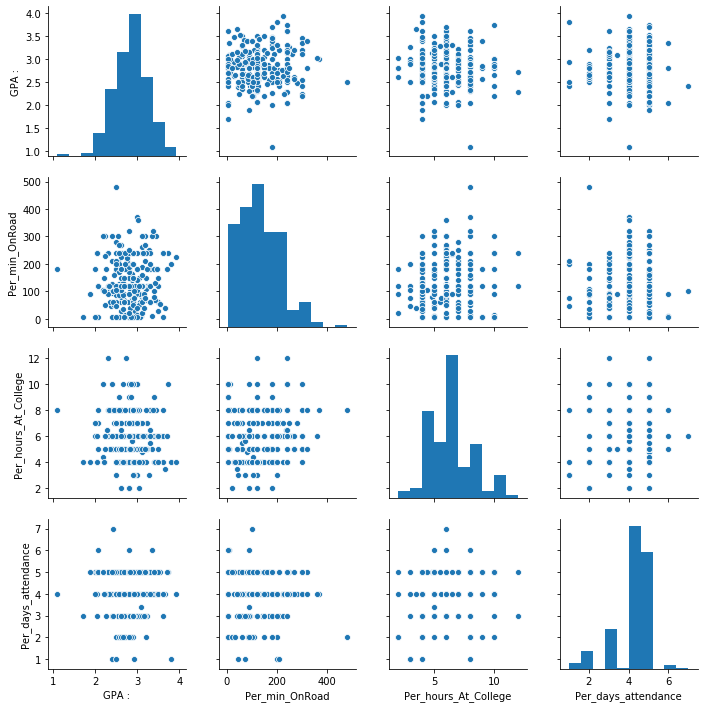

In [787]:
sb.pairplot(data)


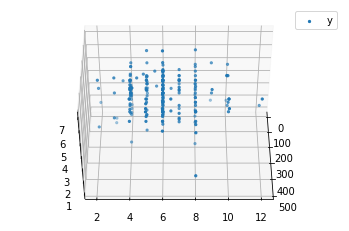

In [788]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(X_1[:, 0], X_1[:, 1],X_1[:,2], label ='y', s =5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 

##<h2>Covariance Matrix and Mean


In [0]:
cov=np.cov(X_1,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(X_1,axis=0)

##Generating New Data from Old Distribution Data 




In [790]:
Size_of_Data=500
New_Data= np.random.multivariate_normal(mean, cov,Size_of_Data)
New_Data.shape

(500, 3)

##<h3 color='red'> Ploting Old Data and New Data</h3>

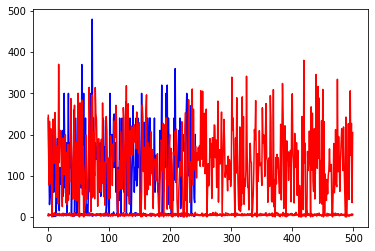

In [791]:
New_Data[New_Data < 0] = 0
plt.plot(x_1,color='blue')
plt.plot(New_Data,color='r')
plt.show()

##This Function Delete rows whose Values = 0

In [0]:
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)

In [0]:
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][2]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)



In [0]:
#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][1]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)



In [0]:
#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][0]<5 or Cleaned_data3[i][0]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4

Final_Data=constrains_per_min_Road(Cleaned_data3)


##<h1 color="blue">Ploting The New Data After Cleaning and Old Data</h1>

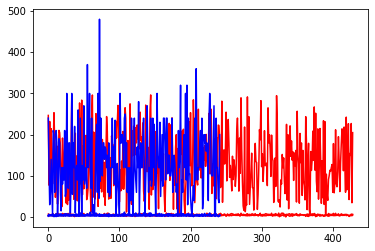

In [796]:
# The New Data Represented by red Color 
plt.plot(Final_Data,color='r')
plt.plot(data,color='blue')
plt.show()

##<h1>The Percentage of data After Cleaning</h1>

In [797]:
Size_After_cleaning=Final_Data.shape[0]
def Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning):
   result=((Size_of_Data-Size_After_cleaning)/Size_of_Data)*100
   print(result)
Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning)

14.2


##<h1>KNN For Testing Distance between two classes</h1>

In [0]:
ones=np.ones(242)


In [799]:
shape = Final_Data.shape[0]
shape

429

In [0]:
zeros=np.zeros(shape)
# column_to_be_added_zeros = np.array(zeros)
# class_zeros = np.column_stack((X, column_to_be_added_zeros))
# class_zeros

In [0]:
Merge_data=np.concatenate((X_1, Final_Data), axis=0)
Y_label=np.concatenate((ones,zeros),axis=0)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Merge_data,Y_label, test_size=0.2) # change test_size and no of features

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [804]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [805]:
from sklearn import metrics

y_pred = classifier.predict(X_test)
print(metrics.accuracy_score( y_pred,y_test))

0.6222222222222222


In [806]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test))

[[84  0]
 [51  0]]
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77       135
         1.0       0.00      0.00      0.00         0

    accuracy                           0.62       135
   macro avg       0.50      0.31      0.38       135
weighted avg       1.00      0.62      0.77       135



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

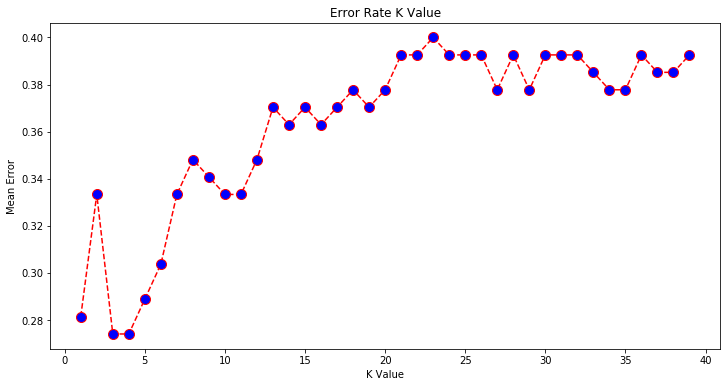

In [808]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##<h1>categoreis GPA</h1>

In [809]:
def gpa_cat(data):
  data = np.where((data >= 2.0 ) & (data < 2.4),-2,data) #pass
  data = np.where((data < 2.0) & (data >= 1.0),-1,data) #fail
  data = np.where(data>=3.4,0,data)#excellent
  data = np.where((data >= 2.8) & (data < 3.4),1,data)#very good
  data = np.where((data >= 2.4) & (data < 2.8),2,data)#good
  data_1 = data.astype(int)
  return data_1
print(gpa_cat(Y_1))

[[-2]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 0]
 [ 2]
 [ 2]
 [ 2]
 [-2]
 [ 0]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 1]
 [ 0]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [-2]
 [ 1]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [-2]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [-2]
 [ 2]
 [-1]
 [ 2]
 [-2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 0]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [ 2]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 0]
 [ 1]
 [-2]
 [ 1]
 [ 0]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [-2]
 [ 2]
 [ 2]
 [ 1]
 [-2]
 [ 1]
 [-2]
 [ 2]
 [ 1]
 [ 0]
 [-2]
 [ 2]
 [ 1]
 [ 1

## Prototype Linear Regression Without Normlization and Category

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:

X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=0)

In [812]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)



In [814]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.347916237245642
Mean Squared Error: 0.20058383518005063
Root Mean Squared Error: 0.44786586739787465


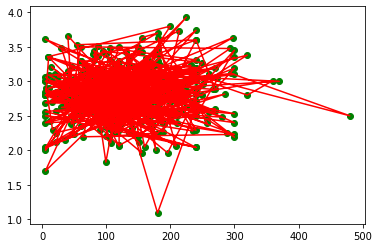

In [815]:
f = X_train1[:,0]
plt.scatter(f, y_train1,color='g')
y_pred1.shape
plt.plot(f, y_train1,color='r')

In [0]:
Reg_coef=regressor.coef_
Reg_inte=regressor.intercept_

In [0]:
#for i in range (35):
 # print(y_test1[i])
  #print("--------------")
  #print(y_pred1[i])

##Linear Regression With Normalization and Category

In [0]:
data1=(data-data.mean())/data.std()
x_1 = data[['Per_min_OnRoad','Per_hours_At_College','Per_days_attendance']]

X_1 = np.array(x_1)
y_1 = data[['GPA :']]
y_1.head()
Y_1 = np.array(y_1)

In [0]:
 Y_label=gpa_cat(Y_1)
X_train, X_test, y_train, y_test = train_test_split(x_1, Y_label, test_size=0.2, random_state=0)

In [820]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [821]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8882883933697403
Mean Squared Error: 1.6856596063655918
Root Mean Squared Error: 1.2983295445939724


##Generate New Data with coefficient

In [0]:
coef=Reg_coef.reshape(3,1)
res= np.dot(Final_Data, coef)


In [0]:
Merge_data=np.concatenate((x_1, Final_Data), axis=0)


In [0]:
Merge_Labels=np.concatenate((Y_1,res),axis=0)


##Train New Model With Merging Data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Merge_data,Merge_Labels, test_size=0.2, random_state=0)

In [826]:
Regress = LinearRegression()
Regress.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)


In [828]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.209092823336506
Mean Squared Error: 1.7868101824461848
Root Mean Squared Error: 1.3367161936799392


In [829]:
for i in range (35):
  print(y_test[i])
  print("--------------")
  print(y_pred[i])

[0.14397133]
--------------
[0.90330228]
[0.15006667]
--------------
[0.7553829]
[2.5]
--------------
[0.97394138]
[0.10224549]
--------------
[0.944245]
[2.4]
--------------
[0.83058625]
[2.85]
--------------
[0.82864816]
[0.10136968]
--------------
[0.92377028]
[0.09893689]
--------------
[1.03221691]
[0.1097811]
--------------
[0.89898894]
[0.12902533]
--------------
[0.87647664]
[3.12]
--------------
[0.98298024]
[0.1672234]
--------------
[0.74051367]
[0.09776263]
--------------
[1.03193327]
[0.05691366]
--------------
[1.11040399]
[0.06793803]
--------------
[1.07352965]
[3.3]
--------------
[0.96973105]
[0.127906]
--------------
[0.84354201]
[0.1003878]
--------------
[0.96927396]
[2.9]
--------------
[0.8322069]
[0.09484931]
--------------
[0.96502888]
[0.10455795]
--------------
[1.02048418]
[0.0836286]
--------------
[1.02647034]
[0.11389814]
--------------
[0.87890254]
[0.09825847]
--------------
[0.99012982]
[0.13874227]
--------------
[0.88531716]
[0.12436682]
------------

##Train Model With Generating Data including Gpa

In [0]:

data_np= np.array(data)
cov=np.cov(data_np,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(data_np,axis=0)
Size_of_Data=242
New_Data= np.random.multivariate_normal(mean, cov,Size_of_Data)
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][3]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)

#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][2]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)


#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][1]<5 or Cleaned_data3[i][1]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4


def GPA(Cleaned_data):
  x=[]
  for i in range(len(Cleaned_data)):
    if Cleaned_data[i][0]<0 or Cleaned_data[i][0]>4:
      x.append(i)  
  cleaned_data5=np.delete(Cleaned_data,x,0)
  return cleaned_data5

cleaned_data4 = constrains_per_min_Road(Cleaned_data3)
Final_Data1 = GPA(cleaned_data4)



In [831]:
data_np

array([[  2.04   , 240.     ,   4.     ,   4.     ],
       [  3.22   , 120.     ,   7.     ,   5.     ],
       [  2.92   ,  30.     ,   4.     ,   5.     ],
       [  3.5    ,  60.     ,   5.     ,   4.     ],
       [  2.86   , 140.     ,   4.     ,   4.     ],
       [  3.18   ,  70.     ,   6.     ,   5.     ],
       [  3.     ,   5.     ,   5.     ,   5.     ],
       [  2.54   , 210.     ,   7.     ,   3.     ],
       [  3.8    , 200.     ,   4.     ,   1.     ],
       [  2.6    ,  60.     ,   4.     ,   2.     ],
       [  2.4    ,  95.     ,   6.     ,   3.     ],
       [  2.4    , 210.     ,   8.     ,   1.     ],
       [  2.     , 180.     ,   6.     ,   5.     ],
       [  3.61   ,   5.     ,   4.     ,   3.     ],
       [  2.5    ,  85.     ,   4.     ,   4.     ],
       [  3.1    , 190.     ,   4.     ,   4.     ],
       [  2.73   , 180.     ,   7.     ,   5.     ],
       [  3.07   ,  60.     ,   7.     ,   4.     ],
       [  2.7    ,  15.     ,   8.     ,   5. 

In [832]:
Final_Data1


array([[  2.81677335,  80.17873089,   8.22049329,   4.77905898],
       [  2.79571328,  78.09504535,   7.90449718,   3.48126038],
       [  2.86579794,  15.05333106,   9.50010444,   3.48565395],
       [  2.73819207, 167.55309917,   5.09135633,   2.64530719],
       [  2.42463629, 186.24027493,   5.68184876,   2.60238529],
       [  1.99802389, 122.54492907,   5.09223155,   4.28435486],
       [  2.51629807,  56.35995637,   5.25033479,   3.4575866 ],
       [  2.21539154, 245.95209976,   7.67948899,   5.68601665],
       [  2.72351578, 181.79191389,   4.71534629,   4.18365921],
       [  2.49461101, 173.80378496,   5.61430495,   4.15933315],
       [  2.88728514,  42.71670056,   6.88897836,   3.96766731],
       [  2.62922789, 120.68390876,   5.307829  ,   3.91251614],
       [  2.45079381, 234.30502159,   5.01962998,   4.3290204 ],
       [  2.99932954,  74.4763611 ,   5.27936453,   4.25754525],
       [  3.26692253, 157.07008106,   6.06023056,   5.25090933],
       [  3.12928767,  28

In [833]:
Merge_data2=np.concatenate((data, Final_Data1), axis=0)
for i in range (200):
  print(Merge_data2[i][0])

2.04
3.22
2.92
3.5
2.86
3.18
3.0
2.54
3.8
2.6
2.4
2.4
2.0
3.61
2.5
3.1
2.73
3.07
2.7
2.8
3.12
3.27
3.1
2.75
3.04
2.85
3.45125
3.04
2.67
3.3
2.25
3.35
2.6
3.19
3.53
2.7
2.7
2.76
2.9
3.2
2.4
3.0
3.1
2.56
2.5
2.85
2.3
2.8
2.55
3.09
2.6
2.6
2.34
3.06
3.42
3.0
2.8
3.0
3.1
2.72
3.14
2.63
3.09
2.94
2.8
2.8
2.6
2.8
2.62
3.29
3.35
2.38
2.5
2.57
2.5
3.3
2.4
2.55
3.24
3.0
2.49
2.86
2.06
2.2
2.77
1.09
2.44
2.35
2.51
2.75
2.8
2.96
2.8
3.39
2.28
3.06
2.62
2.66
3.03
3.1
2.69
2.53
2.5
3.47
2.56
2.7
2.8
2.29
3.27
2.68
3.45
3.3
2.88
3.0
3.0
2.8
3.66
3.12
2.6
2.85
2.9
3.0
2.7
2.85
2.42
2.55
2.59
2.48
2.9
2.82
3.0
2.7
2.54
2.8
2.9
3.14
2.4
2.97
2.6
2.57
2.8
2.67
2.66
2.68
3.74
2.88
2.3
3.18
3.5
3.93
3.16
2.5
2.94
2.23
2.69
2.6
2.85
2.23
2.9
2.33
2.7
3.18
3.6
2.04
2.6
2.85
3.2
2.9
3.0
2.9
2.9
3.4
2.41
2.5
3.31
2.68
2.8
3.2
3.43
2.66
2.89
2.9
2.03
2.5
3.1
2.9
2.8
2.05
2.83
2.9
2.45
2.5
3.06
2.4
1.88
3.38
3.48
2.71
2.6
2.5


In [834]:
x_2 = Merge_data2[:,1:4]
y_2=Merge_data2[:,0:1]
x_2.shape
#for i in range (1107):
 # print(y_2[i])

(455, 3)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_2,y_2, test_size=0.05, random_state=0)


In [836]:
Regress1 = LinearRegression()
Regress1.fit(X_train1, y_train1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [837]:
y_pred1 = Regress1.predict(X_test1)
#X_test1.shape
y_pred1.shape

(23, 1)

In [838]:
zz

array([3.        , 4.        , 2.91508305, 3.57569386, 4.        ,
       5.        , 5.        , 5.62533914, 4.36730264, 5.        ,
       3.62843892, 4.        , 5.        , 3.52763361, 5.        ,
       4.        , 2.        , 5.        , 3.        , 3.32391808,
       4.19830766, 3.65775665, 2.76258765])

In [839]:
print(X_train1.shape)
print(y_train1.shape)

#y_pred1.shape

(432, 3)
(432, 1)


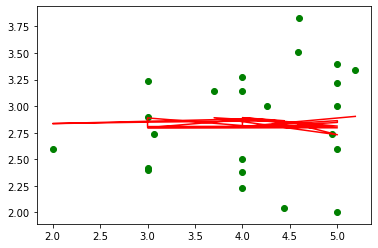

In [840]:

zz = X_test1[:,2]

plt.scatter(zz, y_test1,color='g')
y_pred1.shape
plt.plot(zz, y_pred1,color='r')



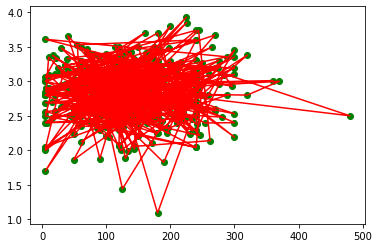

In [841]:

zz = X_train1[:,0]
plt.scatter(zz, y_train1,color='g')
y_pred1.shape
plt.plot(zz, y_train1,color='r')




In [842]:
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 0.41349741127246076
Mean Squared Error: 0.23349122477757958
Root Mean Squared Error: 0.48320929707278976


In [843]:
#df = pd.DataFrame({'Actual': y_test1[10], 'Predicted': X_test1[0]})
for i in range (23):
  print(y_test1[i])
  print("--------------")
  print(y_pred1[i])

[3.33770496]
--------------
[2.90392373]
[3.14]
--------------
[2.80784416]
[3.83258581]
--------------
[2.84234927]
[3.14014645]
--------------
[2.89134159]
[3.]
--------------
[2.73124601]
[3.51119944]
--------------
[2.82564007]
[2.]
--------------
[2.84709565]
[2.6]
--------------
[2.86397345]
[2.99932954]
--------------
[2.82312777]
[3.4]
--------------
[2.79646225]
[2.42]
--------------
[2.79788871]
[2.7347401]
--------------
[2.80301438]
[2.5]
--------------
[2.8796846]
[2.6]
--------------
[2.83633686]
[3.24]
--------------
[2.84992174]
[2.03773193]
--------------
[2.86323157]
[2.23]
--------------
[2.89210283]
[3.22]
--------------
[2.81264023]
[2.4]
--------------
[2.80814232]
[2.9]
--------------
[2.88953654]
[2.38]
--------------
[2.81739795]
[3.27]
--------------
[2.87312557]
[2.74215397]
--------------
[2.80239089]


In [0]:
P = [47.77031978,   8.30340601,   5.33225355],
y_pred2 = Regress1.predict(P)
#y_pred2

Reg_coef=Regress1.coef_
Reg_inte=Regress1.intercept_


##visualization Error

In [0]:
visul_merg = Merge_data2.tolist()


In [0]:
df = pd.DataFrame(visul_merg)
df_1=(df-df.mean())/df.std()

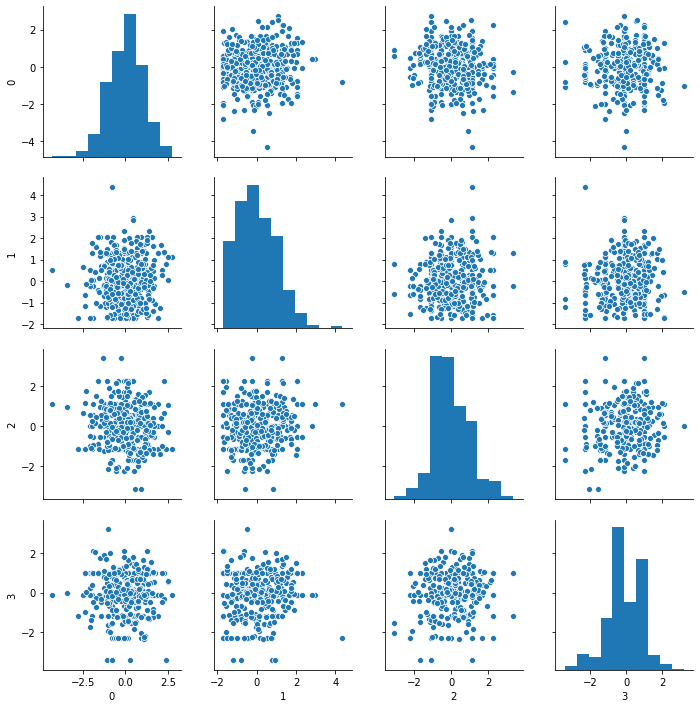

In [847]:
sb.pairplot(df_1)

## XGB



In [0]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [0]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [0]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
x_3 = Merge_data2[:,1:4]
y_3=Merge_data2[:,0:1]

In [0]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_3, y_3, random_state=42)

In [854]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test, y_test)])

[19:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.13365
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.92872
[2]	validation_0-rmse:1.7451
[3]	validation_0-rmse:1.58074
[4]	validation_0-rmse:1.4338
[5]	validation_0-rmse:1.30352
[6]	validation_0-rmse:1.18776
[7]	validation_0-rmse:1.08472
[8]	validation_0-rmse:0.9932
[9]	validation_0-rmse:0.910606
[10]	validation_0-rmse:0.839526
[11]	validation_0-rmse:0.777091
[12]	validation_0-rmse:0.721665
[13]	validation_0-rmse:0.67559
[14]	validation_0-rmse:0.636064
[15]	validation_0-rmse:0.600542
[16]	validation_0-rmse:0.571361
[17]	validation_0-rmse:0.543956
[18]	validation_0-rmse:0.522344
[19]	validation_0-rmse:0.503391
[20]	validation_0-rmse:0.489127
[21]	validation_0-rmse:0.47688
[22]	validation_0-rmse:0.467289
[23]	validation_0-rmse:0.458953
[24]	validation_0-rmse:0.452402
[25]	validation_0-rmse:0.4459
[2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [855]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))


best score: 0.42419, best iteration: 43, best ntree limit 44


In [0]:
#xgb_model.fit(x_3, y_3)


In [0]:
y_pred = xgb_model.predict(X_test)


In [0]:
#y_pred_5 = xgb_model.predict(x_3)


In [0]:
#mse=mean_squared_error(y_3, y_pred_5)


In [0]:
#fff = np.sqrt(mse)
#fff

In [0]:
xgb_model


##go

In [0]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [0]:
scores = []


In [0]:
for train_index, test_index in kfold.split(x_3):   
    X_train, X_test = x_3[train_index], x_3[test_index]
    y_train, y_test = y_3[train_index], y_3[test_index]

In [0]:
xgb_model = xgb.XGBRegressor(objective="reg:linear")
xgb_model.fit(X_train, y_train)

In [0]:
y_pred = xgb_model.predict(X_test)


In [0]:
scores.append(mean_squared_error(y_test, y_pred))


In [0]:
display_scores(np.sqrt(scores))


In [0]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)


In [0]:
scores = cross_val_score(xgb_model, x_3, y_3, scoring="neg_mean_squared_error", cv=5)


In [0]:
display_scores(np.sqrt(-scores))


In [0]:
(0.041)**2

##Thinking In Tensors_1

In [0]:
import torch


In [0]:
x_features_1 = Merge_data2[:,1:4]
y_labels_1 = Merge_data2[:,0:1]
inputs = x_features_1
targets = y_labels_1

In [0]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


In [862]:
print(inputs)
print(targets)

tensor([[240.0000,   4.0000,   4.0000],
        [120.0000,   7.0000,   5.0000],
        [ 30.0000,   4.0000,   5.0000],
        ...,
        [ 57.5468,   6.2732,   4.7325],
        [ 20.8423,   4.9138,   5.2956],
        [138.6013,   6.0546,   3.6858]], dtype=torch.float64)
tensor([[2.0400],
        [3.2200],
        [2.9200],
        [3.5000],
        [2.8600],
        [3.1800],
        [3.0000],
        [2.5400],
        [3.8000],
        [2.6000],
        [2.4000],
        [2.4000],
        [2.0000],
        [3.6100],
        [2.5000],
        [3.1000],
        [2.7300],
        [3.0700],
        [2.7000],
        [2.8000],
        [3.1200],
        [3.2700],
        [3.1000],
        [2.7500],
        [3.0400],
        [2.8500],
        [3.4512],
        [3.0400],
        [2.6700],
        [3.3000],
        [2.2500],
        [3.3500],
        [2.6000],
        [3.1900],
        [3.5300],
        [2.7000],
        [2.7000],
        [2.7600],
        [2.9000],
        [3.2000],
     

In [0]:
w = torch.randn(1, 3, requires_grad=True)
b = torch.randn(1, requires_grad=True)


In [864]:
inputs.type()


'torch.DoubleTensor'

In [0]:
def model(x):
    return x @ w.t() + b

In [0]:
preds = model(inputs.float())


In [867]:
print(preds)


tensor([[12.0995],
        [12.1436],
        [ 8.4592],
        [ 8.6184],
        [ 9.8570],
        [10.4670],
        [ 8.4540],
        [12.0239],
        [ 7.9956],
        [ 5.9250],
        [ 8.8896],
        [10.4413],
        [12.9337],
        [ 5.7606],
        [ 8.6236],
        [10.9783],
        [13.4891],
        [ 9.7291],
        [10.3443],
        [ 9.4085],
        [10.0248],
        [ 8.8531],
        [11.4709],
        [13.6065],
        [ 8.9913],
        [11.3535],
        [15.6665],
        [12.2610],
        [ 8.2873],
        [12.9755],
        [10.7958],
        [ 9.6351],
        [10.1242],
        [15.0694],
        [10.1306],
        [11.8648],
        [11.5882],
        [12.7618],
        [ 7.4971],
        [ 9.2678],
        [11.7004],
        [ 8.7775],
        [13.6588],
        [ 7.4685],
        [ 8.6184],
        [15.4318],
        [12.6990],
        [10.6755],
        [11.7004],
        [ 8.6497],
        [13.8830],
        [ 7.4425],
        [ 9.

In [868]:
print(targets)


tensor([[2.0400],
        [3.2200],
        [2.9200],
        [3.5000],
        [2.8600],
        [3.1800],
        [3.0000],
        [2.5400],
        [3.8000],
        [2.6000],
        [2.4000],
        [2.4000],
        [2.0000],
        [3.6100],
        [2.5000],
        [3.1000],
        [2.7300],
        [3.0700],
        [2.7000],
        [2.8000],
        [3.1200],
        [3.2700],
        [3.1000],
        [2.7500],
        [3.0400],
        [2.8500],
        [3.4512],
        [3.0400],
        [2.6700],
        [3.3000],
        [2.2500],
        [3.3500],
        [2.6000],
        [3.1900],
        [3.5300],
        [2.7000],
        [2.7000],
        [2.7600],
        [2.9000],
        [3.2000],
        [2.4000],
        [3.0000],
        [3.1000],
        [2.5600],
        [2.5000],
        [2.8500],
        [2.3000],
        [2.8000],
        [2.5500],
        [3.0900],
        [2.6000],
        [2.6000],
        [2.3400],
        [3.0600],
        [3.4200],
        [3

In [0]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [870]:
loss = mse(preds, targets)
print(loss)

tensor(73.2482, dtype=torch.float64, grad_fn=<DivBackward0>)


In [0]:
loss.backward()


In [872]:
print(w)


tensor([[0.0224, 0.5554, 1.0690]], requires_grad=True)


In [873]:
print(w.grad)


tensor([[2569.4998,  102.9347,   69.4685]])


In [874]:
print(b)


tensor([0.2201], requires_grad=True)


In [875]:
print(b.grad)


tensor([16.4184])


In [876]:
w.grad.zero_()


tensor([[0., 0., 0.]])

In [877]:
b.grad.zero_()

tensor([0.])

In [0]:
preds = model(inputs.float())


In [879]:
print(preds)


tensor([[12.0995],
        [12.1436],
        [ 8.4592],
        [ 8.6184],
        [ 9.8570],
        [10.4670],
        [ 8.4540],
        [12.0239],
        [ 7.9956],
        [ 5.9250],
        [ 8.8896],
        [10.4413],
        [12.9337],
        [ 5.7606],
        [ 8.6236],
        [10.9783],
        [13.4891],
        [ 9.7291],
        [10.3443],
        [ 9.4085],
        [10.0248],
        [ 8.8531],
        [11.4709],
        [13.6065],
        [ 8.9913],
        [11.3535],
        [15.6665],
        [12.2610],
        [ 8.2873],
        [12.9755],
        [10.7958],
        [ 9.6351],
        [10.1242],
        [15.0694],
        [10.1306],
        [11.8648],
        [11.5882],
        [12.7618],
        [ 7.4971],
        [ 9.2678],
        [11.7004],
        [ 8.7775],
        [13.6588],
        [ 7.4685],
        [ 8.6184],
        [15.4318],
        [12.6990],
        [10.6755],
        [11.7004],
        [ 8.6497],
        [13.8830],
        [ 7.4425],
        [ 9.

In [0]:
loss = mse(preds, targets)


In [881]:
print(loss)


tensor(73.2482, dtype=torch.float64, grad_fn=<DivBackward0>)


In [0]:
loss.backward()


In [0]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [884]:
print(w)


tensor([[-0.0033,  0.5543,  1.0683]], requires_grad=True)


In [885]:
preds = model(inputs.float())
loss = mse(preds, targets)
print(loss)

tensor(23.8546, dtype=torch.float64, grad_fn=<DivBackward0>)


In [0]:
for i in range(40000):
    preds = model(inputs.float())
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [888]:
preds = model(inputs.float())
loss = mse(preds, targets)
print(loss)

tensor(0.4100, dtype=torch.float64, grad_fn=<DivBackward0>)


In [889]:
preds


tensor([[2.7334],
        [3.2510],
        [2.9775],
        [2.5600],
        [2.6074],
        [3.1347],
        [2.9994],
        [2.3469],
        [1.1568],
        [1.4891],
        [2.1487],
        [1.3828],
        [3.2733],
        [1.9286],
        [2.5381],
        [2.6704],
        [3.3266],
        [2.6667],
        [3.1721],
        [2.5822],
        [3.0832],
        [2.5288],
        [3.2132],
        [3.3111],
        [2.1987],
        [3.2288],
        [3.0224],
        [3.2355],
        [2.5192],
        [2.8712],
        [2.2558],
        [3.5144],
        [2.6778],
        [3.3711],
        [3.1158],
        [2.7645],
        [3.1977],
        [2.8149],
        [2.4970],
        [1.7655],
        [3.2040],
        [2.1424],
        [2.8653],
        [1.6866],
        [2.5600],
        [3.0536],
        [3.3044],
        [3.2128],
        [3.2040],
        [2.2925],
        [2.8779],
        [2.0231],
        [2.6104],
        [3.1977],
        [2.6259],
        [3

In [890]:
targets

tensor([[2.0400],
        [3.2200],
        [2.9200],
        [3.5000],
        [2.8600],
        [3.1800],
        [3.0000],
        [2.5400],
        [3.8000],
        [2.6000],
        [2.4000],
        [2.4000],
        [2.0000],
        [3.6100],
        [2.5000],
        [3.1000],
        [2.7300],
        [3.0700],
        [2.7000],
        [2.8000],
        [3.1200],
        [3.2700],
        [3.1000],
        [2.7500],
        [3.0400],
        [2.8500],
        [3.4512],
        [3.0400],
        [2.6700],
        [3.3000],
        [2.2500],
        [3.3500],
        [2.6000],
        [3.1900],
        [3.5300],
        [2.7000],
        [2.7000],
        [2.7600],
        [2.9000],
        [3.2000],
        [2.4000],
        [3.0000],
        [3.1000],
        [2.5600],
        [2.5000],
        [2.8500],
        [2.3000],
        [2.8000],
        [2.5500],
        [3.0900],
        [2.6000],
        [2.6000],
        [2.3400],
        [3.0600],
        [3.4200],
        [3

## Thinking In Tensors_2  **ماعدا العاق عمر محمد **

In [0]:
import torch.nn as nn


In [0]:
from torch.utils.data import TensorDataset, DataLoader


In [0]:
train_ds = TensorDataset(inputs.float(), targets.float())


In [894]:
train_ds[0:3]


(tensor([[240.,   4.,   4.],
         [120.,   7.,   5.],
         [ 30.,   4.,   5.]]), tensor([[2.0400],
         [3.2200],
         [2.9200]]))

In [895]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[235.0000,   6.5000,   4.0000],
         [156.1492,   6.3900,   3.3237],
         [ 50.0000,   6.0000,   5.0000],
         [ 92.3691,   5.9526,   3.9324],
         [240.0000,  10.0000,   5.0000]]), tensor([[2.2800],
         [2.8521],
         [2.9000],
         [2.5136],
         [2.9000]])]

In [0]:
model = nn.Linear(3, 1)


In [897]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0434,  0.0010, -0.3337]], requires_grad=True)
Parameter containing:
tensor([-0.0179], requires_grad=True)


In [0]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)


In [0]:
import torch.nn.functional as F


In [0]:
loss_fn = F.mse_loss


In [901]:
loss = loss_fn(model(inputs.float()), targets.float())
loss.type()

'torch.FloatTensor'

In [0]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs.float()), targets.float()))


In [969]:
fit(1700, model, loss_fn, opt)


Training loss:  tensor(0.1622, grad_fn=<MseLossBackward>)


In [936]:
preds = model(inputs.float())
preds.shape


torch.Size([455, 1])

In [937]:
targets.shape

torch.Size([455, 1])

In [938]:
preds[1]


tensor([3.0085], grad_fn=<SelectBackward>)

In [939]:
targets[1]

tensor([3.2200], dtype=torch.float64)

In [940]:
preds[7]

tensor([2.7282], grad_fn=<SelectBackward>)

In [941]:
targets[7]

tensor([2.5400], dtype=torch.float64)